<h1>UK ACCIDENT DATA ANALYTICS</h1>
<hr>
<h3>Analyst: John Kevin Aguilera</h3>

<h5>Importing libraries</h5>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import folium
from folium.plugins import HeatMap

<h3>Importing dataset and converting it into column</h3>

In [2]:
uk = pd.read_csv('datasets//uk_road_accident.csv')

In [3]:
uk

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<h3>Changing the data types of the columns</h3>

In [5]:
uk.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [6]:
uk.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h3>Cleaning empty datas</h3>

In [7]:
uk.isna().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h5>Cleaning empty numerical datas</h5>

In [8]:
uk['Latitude'] = uk['Latitude'].fillna(uk['Latitude'].mean())
uk['Longitude'] = uk['Longitude'].fillna(uk['Longitude'].mean())

In [9]:
uk.isna().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h5>Cleaning non-numerical empty datas </h5>

In [10]:
uk['Road_Surface_Conditions'] = uk['Road_Surface_Conditions'].fillna('unaccountable')
uk['Road_Type'] = uk['Road_Type'].fillna('unaccountable')
uk['Urban_or_Rural_Area'] = uk['Urban_or_Rural_Area'].fillna('unaccountable')
uk['Weather_Conditions'] = uk['Weather_Conditions'].fillna('unaccountable')

In [11]:
uk.isna().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h3>Extracting date information using pandas data time</h1>

In [12]:
uk['Accident Date'] = uk['Accident Date'].str.strip()
uk['Accident Date'] = uk['Accident Date'].astype('str')
uk['Accident Date'] = uk['Accident Date'].str.replace('/', '-')

In [13]:
uk['Accident Date'] = pd.to_datetime(uk['Accident Date'], dayfirst = True, errors='coerce')

uk['Year'] = uk['Accident Date'].dt.year
uk['Month'] = uk['Accident Date'].dt.month
uk['Day'] = uk['Accident Date'].dt.day
uk['DayOfWeek'] = uk['Accident Date'].dt.dayofweek

<h1>UniVariate: Accident Growth Visualization</h1>

<h2>Visualization of the number of accidents recorded in UK from 2019 to 2022</h2>

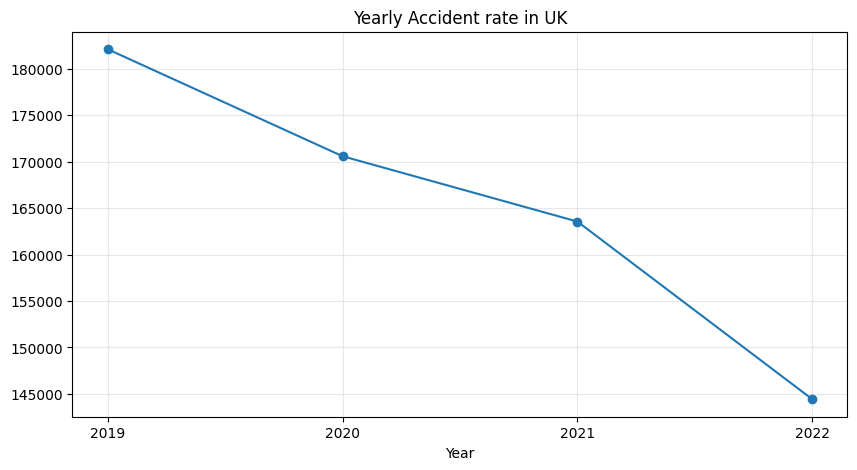

In [14]:
yearly_data = uk.groupby(['Year'])['Index'].count()

yearly_data.plot(
                marker='o',
                figsize=(10,5),
                title = 'Yearly Accident rate in UK',

)
plt.xticks(range(2019, 2023),['2019','2020','2021','2022'])
plt.grid(alpha=0.3)
plt.show()

<h1>Insight #1:</h1>
<h5>The number of Accident per year in UK has declined since 2019. From 2019 to 2022, there is an <b>80% decrease</b> on accidents reports recorded per year </h5>

<h2>Monthly comparison of the number of accidents recorded from January 2019 to December 2022</h2>

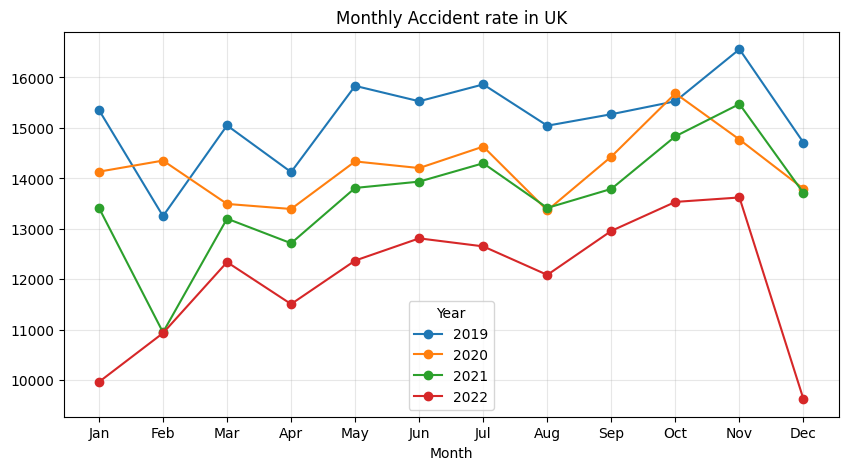

In [15]:
monthly_data = uk.groupby(['Year','Month'])['Index'].count()

monthly_data = monthly_data.unstack(level=0)
monthly_data.plot(
                marker='o',
                figsize=(10,5),
                title = 'Monthly Accident rate in UK',

)
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

<h1>Insight #2:</h1>
<h5>1. In the month of November, the number of accidents peaked for every year surpassing it's precedent month making it the month with the highest number of accident recorded.</h5>
<h5>2. Contrary to November, the month of February recorded the least amount of accidents every year. </h5>
<h5>3. A stable number of growth can be seen on the months of May to July, with no major increase or decrease</h5>
<h5>4. December of the Year 2022 hold the lowest number of Accidents recorded.</h5>

<h2>Visualization of the division of Accident Severity on the overall reports</h2>

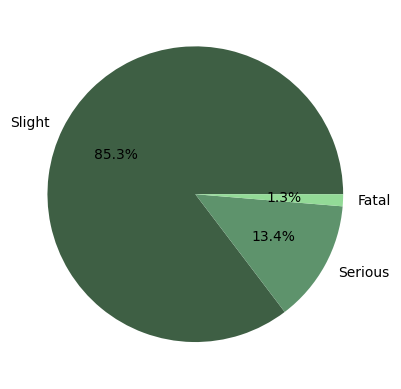

In [16]:
severity_counts = uk['Accident_Severity'].value_counts()

plt.pie(
        severity_counts,
        labels = severity_counts.index,
        autopct = '%1.1f%%',
        textprops={'color':"black"},
        colors = ['#3E5F44','#5E936C','#93DA97']

)
plt.show()

In [17]:
severity_counts.index

Index(['Slight', 'Serious', 'Fatal'], dtype='object', name='Accident_Severity')

<h1>Insight #3:</h1>
<h5><b>85.3%<b> of overall reports consist of slight severity while the remaining <b>13.4% and 1.3%</b> consist of serious and fatal respectively

<h2>Visualization of the number of reports recored per Urban or Rural area </h2>

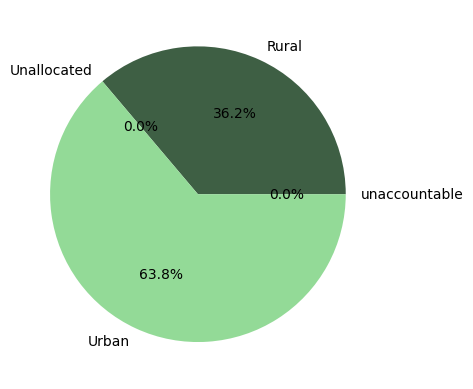

In [18]:
PerArea = uk.groupby('Urban_or_Rural_Area')['Index'].count()

plt.pie(
        PerArea,
        labels = PerArea.index,
        autopct = '%1.1f%%',
        textprops={'color':"black"},
        colors = ['#3E5F44','#5E936C','#93DA97']

)
plt.show()

<h1>Insight #4: </h1>
<h5>According to the data, 63.8% of the overall reports were from Urban area while the remaining 36.2% were from Rural area. This means that for every 2 accident Urban area has equates to 2 accidents on a Rural area. </h5>

<h2> Number of reports per district from 2019 to 2022</h2>

In [19]:
pd.set_option('display.max_rows', 20)
PerDistrict = uk.groupby(['District Area','Year'])['Index'].count()
PerDistrict.unstack()

Year,2019,2020,2021,2022
District Area,,,,
Aberdeen City,365.0,513.0,445.0,NaN
Aberdeenshire,552.0,691.0,687.0,NaN
Adur,171.0,164.0,155.0,129.0
Allerdale,305.0,299.0,298.0,226.0
Alnwick,107.0,105.0,20.0,NaN
...,...,...,...,...
Wychavon,366.0,389.0,323.0,283.0
Wycombe,502.0,449.0,397.0,381.0
Wyre,328.0,295.0,321.0,294.0


In [20]:
uk['District Area'].value_counts().sort_values(ascending=False).head(n=3)

District Area
Birmingham    13491
Leeds          8898
Manchester     6720
Name: count, dtype: int64

In [21]:
uk['District Area'].value_counts().sort_values(ascending=False).tail(n=3)

District Area
Shetland Islands    133
Orkney Islands      117
Clackmannanshire     91
Name: count, dtype: int64

<h1>Insight #5:</h1>
<h5>1. Out of all the district area, the Birmingham district stood out with the consistent 3000 reports each year</h5>
<h5>2. The top three district area with the highest reports per year are Birmingham, Leeds, and Manchester</h5>

<h1>Insight #6:</h1>
<h5>1. Clackmannanshire district is the safest district from road accidents with 91 reports from the year 2019 to 2022</h5>
<h5>2. The top three district area with the lowest number of road accidents recorded are: Shetland Islands, Orkney Islands, and Clackmannanshire</h5>

<h2>Visualization of the number of Vehicles involved per recorded accidents</h2>

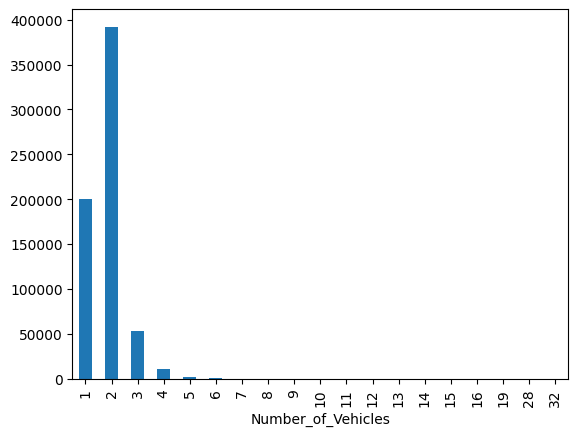

In [22]:
# uk['Number_of_Vehicles'].value_counts()

PerVehicle = uk.groupby(['Number_of_Vehicles'])['Index'].count().plot(kind='bar')


<h1>Insight #7:</h1>
<h5>As visualized above, the most common number of vehicles involved per reports is two vehicles.</h5>
<h3>To futher analyze the data, we can now remove 1 and 2 Index from the bar </h3>

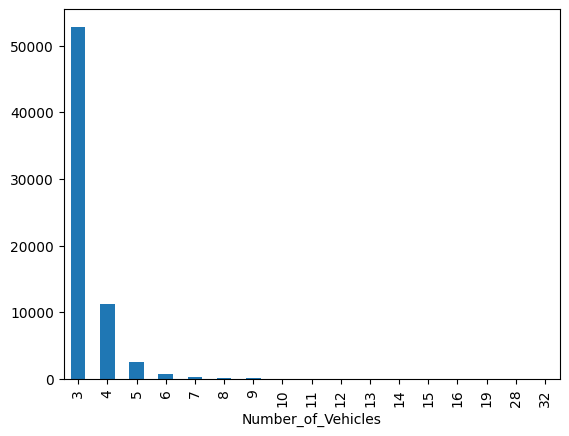

In [23]:
PerVehicle = uk[(uk['Number_of_Vehicles'] != 1) & (uk['Number_of_Vehicles'] != 2)].groupby(['Number_of_Vehicles'])['Index'].count().plot(kind='bar')

<h1>Insight #8: </h1>
<h5>As seen on the bar chart, it's hard to see the number of vehicles from 10 to 32. This doesn't mean that they are irrelevant</h5>

<h1>BiVariate: Visualization of District Area column with other columns</h1>

<h3>Pie Chart: Distribution of accident severity on Birmingham District, the district with the highest number of accidents recorded</h3>

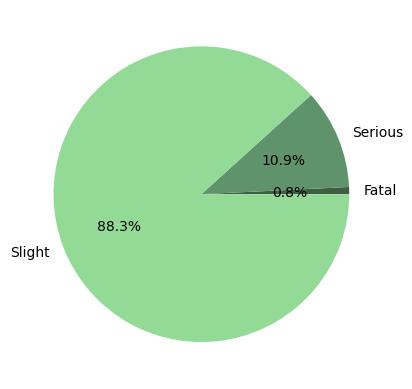

In [24]:
birmingham = uk[uk['District Area'] == 'Birmingham']
birmingham_df = birmingham.groupby(['Accident_Severity'])['Index'].count()

plt.pie(
        birmingham_df,
        labels = birmingham_df.index,
        autopct = '%1.1f%%',
        textprops={'color':"black"},
        colors = ['#3E5F44','#5E936C','#93DA97']

)
plt.show()

<h1>Insight #9:</h1>
<h5>Despite the high number of record, 88.3% of it are Slight severity while 0.8% are fatal</h5>

<h3>Pie Chart: Distribution of accident severity on Clackmannanshire District, the district with the lowest number of accidents recorded</h3>

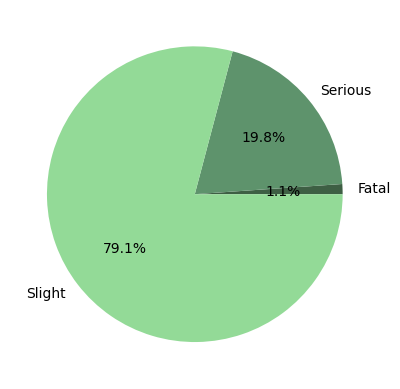

In [25]:
clackmannanshire = uk[uk['District Area'] == 'Clackmannanshire']
clackmannanshire_df= clackmannanshire.groupby(['Accident_Severity'])['Index'].count()

plt.pie(
        clackmannanshire_df,
        labels = clackmannanshire_df.index,
        autopct = '%1.1f%%',
        textprops={'color':"black"},
        colors = ['#3E5F44','#5E936C','#93DA97']

)
plt.show()

<h1>Insight #10:</h1>
<h5>Despite the lowest number of accidents recorded, Clackmannshire district has 19.8% Serious severity while 1.1% are fatal arguably bigger than the Birmingham district</h5>

<h3>Visualization of the number of casualties per year on the top three district with the highest number of accidents recorded</h3>

In [26]:
uk['District Area'].value_counts().sort_values(ascending=False).head(n=3)

District Area
Birmingham    13491
Leeds          8898
Manchester     6720
Name: count, dtype: int64

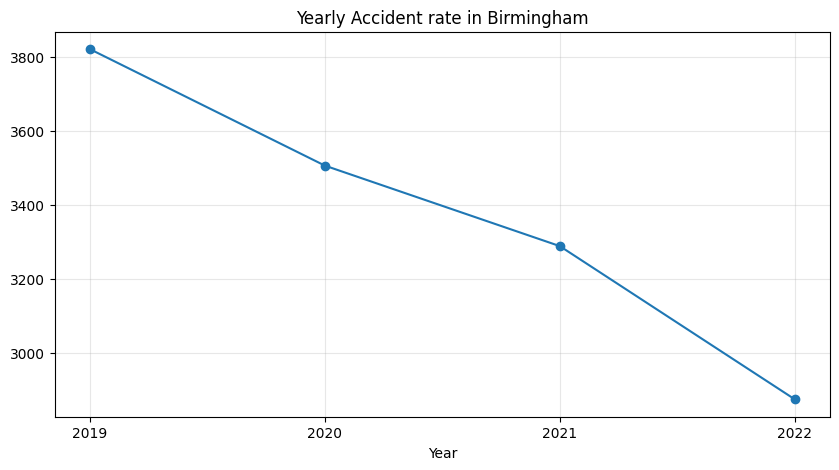

In [27]:
birmingham_casualty = birmingham.groupby(['Year'])['Index'].count()

birmingham_casualty.plot(
                marker='o',
                figsize=(10,5),
                title = 'Yearly Accident rate in Birmingham',

)
plt.xticks(range(2019,2023))
plt.grid(alpha=0.3)
plt.show()

<h1> Insight #11:</h1>
<h5>Even though the number of records are still higher than the average</h5>

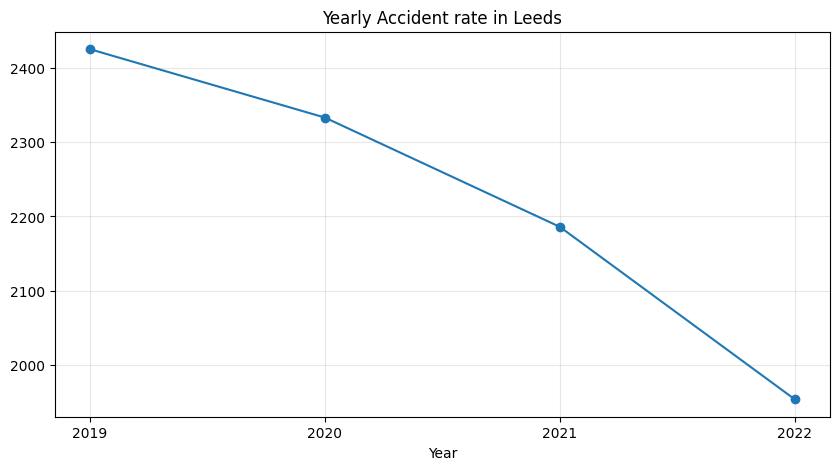

In [28]:
leeds = uk[uk['District Area'] == 'Leeds']
leeds_casualty = leeds.groupby(['Year'])['Index'].count()

leeds_casualty.plot(
                marker='o',
                figsize=(10,5),
                title = 'Yearly Accident rate in Leeds',

)
plt.xticks(range(2019,2023))
plt.grid(alpha=0.3)
plt.show()

<h1>Insight #12:</h1>
<h5>In comparison with Birmingham, the rate of decline of the number of accident on Leeds smaller</h5>

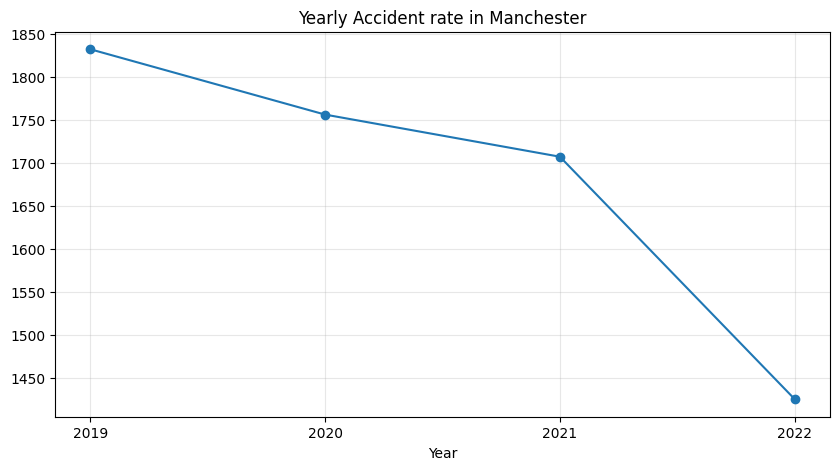

In [29]:
manchester = uk[uk['District Area'] == 'Manchester']
manchester_casualty = manchester.groupby(['Year'])['Index'].count()

manchester_casualty.plot(
                marker='o',
                figsize=(10,5),
                title = 'Yearly Accident rate in Manchester',

)
plt.xticks(range(2019,2023))
plt.grid(alpha=0.3)
plt.show()

<h1>Insight #13: </h1>
<h5>Among three, Manchester has the smallest rate of decline on the number of accidents per year</h5>

<h3>Visualization of the number of casualties per year on the top three district with the lowest number of accidents recorded</h3>

In [30]:
uk['District Area'].value_counts().sort_values(ascending=False).tail(n=3)

District Area
Shetland Islands    133
Orkney Islands      117
Clackmannanshire     91
Name: count, dtype: int64

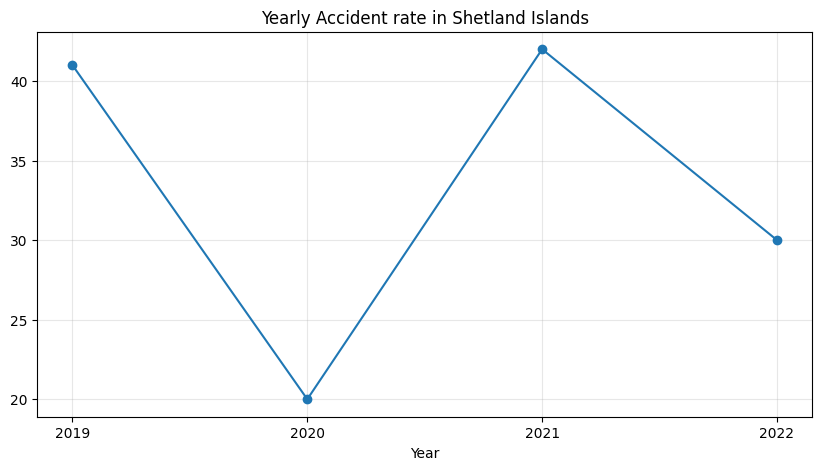

In [31]:
shetland_islands = uk[uk['District Area'] == 'Shetland Islands']
shetland_islands_casualty = shetland_islands.groupby(['Year'])['Index'].count()

shetland_islands_casualty.plot(
                marker='o',
                figsize=(10,5),
                title = 'Yearly Accident rate in Shetland Islands',

)
plt.xticks(range(2019,2023))
plt.grid(alpha=0.3)
plt.show()

<h1>Insight #14: </h1>
<h5>Surprisingly, the rate of growth on the number of accidents recorded on Shetland Islands are intervally increasing and declining.</h5>

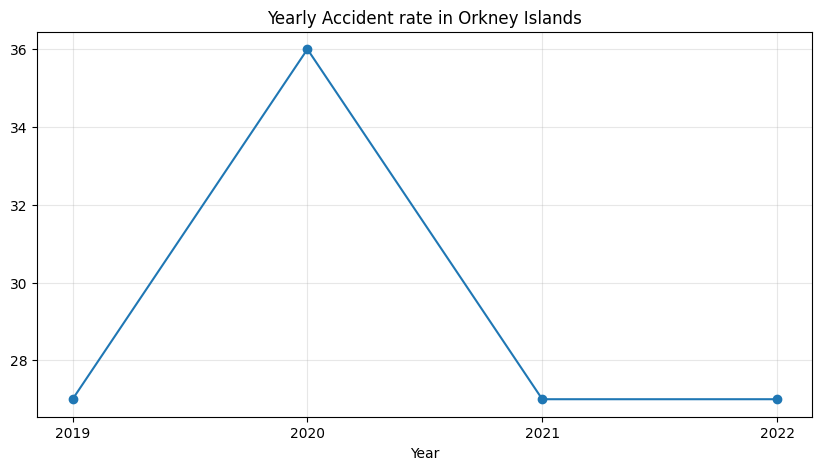

In [32]:
orkney_islands = uk[uk['District Area'] == 'Orkney Islands']
orkney_islands_casualty = orkney_islands.groupby(['Year'])['Index'].count()

orkney_islands_casualty.plot(
                marker='o',
                figsize=(10,5),
                title = 'Yearly Accident rate in Orkney Islands',

)
plt.xticks(range(2019,2023))
plt.grid(alpha=0.3)
plt.show()

<h1>Insight #15:</h1>
<h5>Unlike Shetland Islands, a sudden spike of reports occured during the pandemic then continued to become stable again by the year 2021</h5>

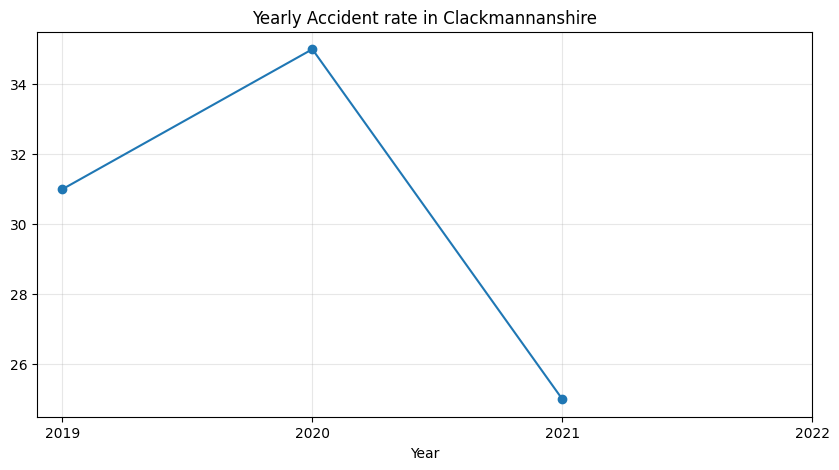

In [33]:
clackmannanshite = uk[uk['District Area'] == 'Clackmannanshire']
clackmannanshire_casualty = clackmannanshire.groupby(['Year'])['Index'].count()

clackmannanshire_casualty.plot(
                marker='o',
                figsize=(10,5),
                title = 'Yearly Accident rate in Clackmannanshire',

)
plt.xticks(range(2019,2023))
plt.grid(alpha=0.3)
plt.show()

<h1>Insight #16:</h1>
<h5>Similar to Orkney Islands, Clackmannanshire district also experienced a spike on the number of reports recorded with no reports on the year 2022</h5>

<h1>Insight #17:</h1>
<h5>Upon visualizing the Top three highest number of recorded reports and the Top three lowest number of recorded reports, it is inevitable that:</h5>
<h5>1. Only the top three lowest experienced a growth rate, the top three lowest always experienced a rate of decline</h5>
<h5>2. Even though they have the lowest number of reports, their line charts are much more wild than the top three highest</h5>

<h3>Analysis on how road type affect the number of casualties on a selected district</h3>

In [34]:
district_sample = uk['District Area'].sample(1)
# district_sample
print('Selected District is Mendip')

Selected District is Mendip


<Axes: xlabel='Road_Type'>

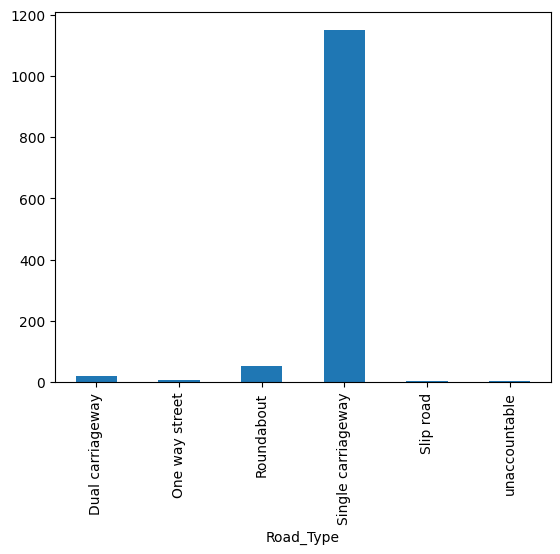

In [35]:
roadtype_sample = uk[uk['District Area'] == 'Mendip']
PerCasualty_rt = roadtype_sample.groupby(['Road_Type'])['Index'].count()

PerCasualty_rt.plot(kind='bar')

<h1>Insight #18:</h1>
<h5>In the selected district of Mendip, 'Single carriageway' is the number one Road type when it comes it to accident reports</h5>

<h2>Visual comparison with District Birmingham, the number one district with the highest number of reports recorded</h2>

<Axes: xlabel='Road_Type'>

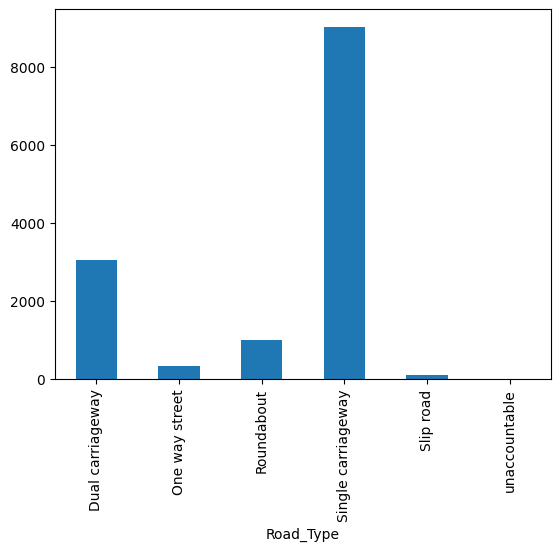

In [36]:
roadtype_sample = uk[uk['District Area'] == 'Birmingham']
PerCasualty_rt = roadtype_sample.groupby(['Road_Type'])['Index'].count()

PerCasualty_rt.plot(kind='bar')

<h1>Insight #19:</h1>
<h5>Similar to Mendip District, Birmingham's reports regarding Road types is dominated by Single carriageway. Surprisingly, the gap between other road types were not as big as District Mendip</h5>

<h3>Visualization of the Comparison of number of weekly accident reports on two district during 2019 to 2022</h3>

In [37]:
# uk['District Area'].sample(n=1)
print('Selected District is Chichester')

Selected District is Chichester


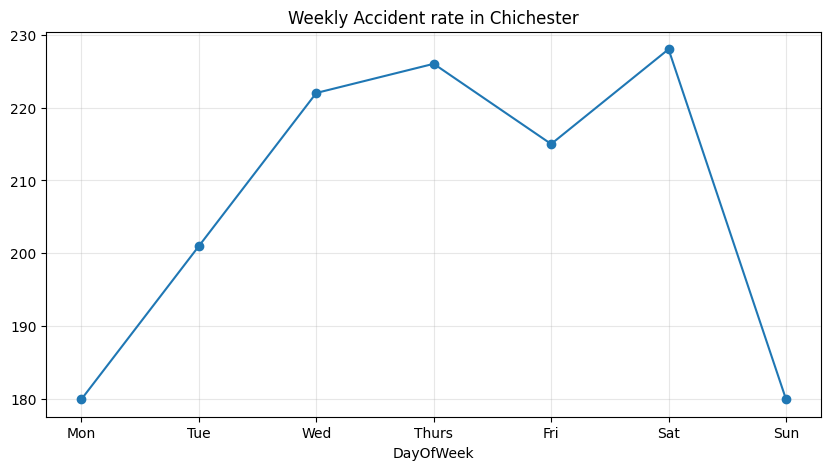

In [38]:
chichester = uk[uk['District Area'] == 'Chichester']
weekly_data = chichester.groupby(['DayOfWeek'])['Index'].count()
# weekly_data = weekly_data.unstack(level=0)

weekly_data.plot(
                marker='o',
                figsize=(10,5),
                title = 'Weekly Accident rate in Chichester',

)
plt.xticks(range(0,7),['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])
plt.grid(alpha=0.3)
plt.show()

<h1>Insight #20: </h1>
<h5>On a selected district of Chichester, the number of accidents reported peaked at Saturday, making the it the day with the most number of accident during 2019 to 2022 at the said district. </h5>

<h3>Visual comparison with Clackmannanshire district, the district with the lowest number of accidents from 2019 to 2022</h5>

In [39]:
uk['District Area'].value_counts().sort_values(ascending=False).tail(n=1)

District Area
Clackmannanshire    91
Name: count, dtype: int64

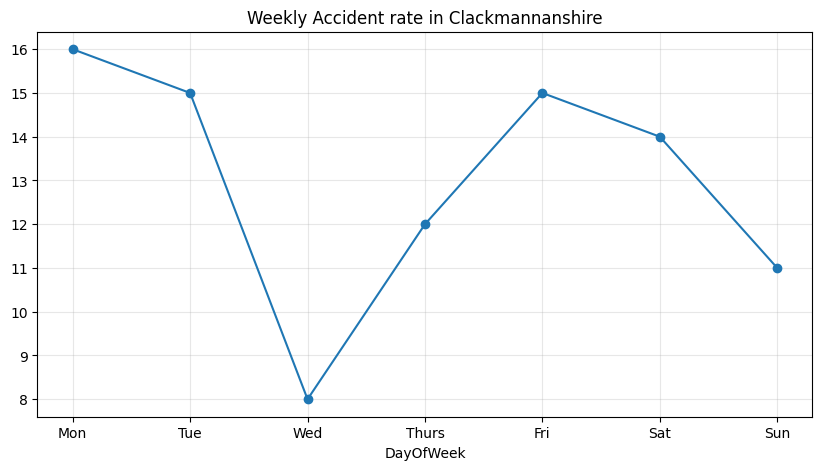

In [40]:
weekly_data = clackmannanshire.groupby(['DayOfWeek'])['Index'].count()
# weekly_data = weekly_data.unstack(level=0)

weekly_data.plot(
                marker='o',
                figsize=(10,5),
                title = 'Weekly Accident rate in Clackmannanshire',

)
plt.xticks(range(0,7),['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])
plt.grid(alpha=0.3)
plt.show()

<h1>Insight #21:</h1>
<h5>As seen on the chart, the result of the comparison gave two contrasting data. Clackmannanshire District's weekly accident report shows that the District is safest at Wednesday, with 8 reports from 2019 to 2022. In contrast, Accidents at the district often happenned during Weekdays, With Monday, Tuesday, and Friday being a hotspot. </h5>



<h3>Visualization on the number of reports per Weather Conditions over the Month</h3>

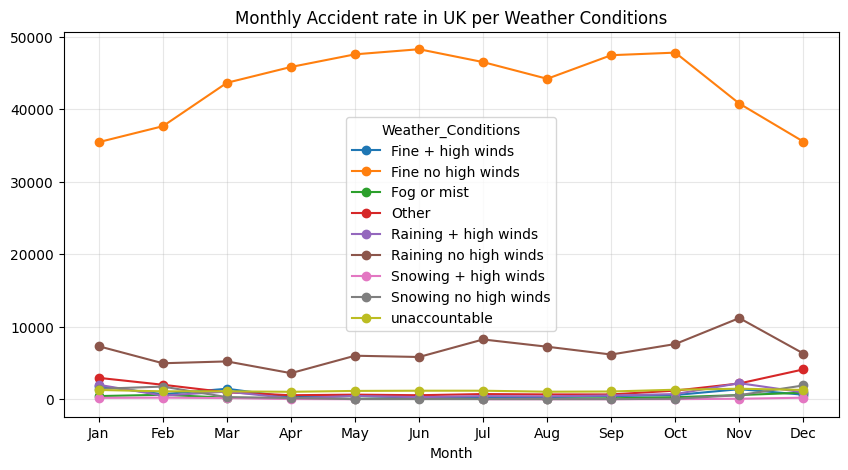

In [41]:
Weather_df = uk.groupby(['Weather_Conditions','Month'])['Index'].count()
Weather_df = Weather_df.unstack(level=0)

Weather_df.plot(marker='o',
                figsize=(10,5),
                title = 'Monthly Accident rate in UK per Weather Conditions',

)
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

<h1>Insight #22:</h1>
<h5>Breakdown:</h5>
1. 'Fine no high winds' weather condition is the dominant weather condition on report
</br>2. As we can see, it's low during January and February, where Snow are just starting to melt and rainy weather is dominant, this is supported by an increase on 'snow and wind related' weather conditions

<h3>Removing 'Fine no high winds' weather condition to better analyze the data</h3>

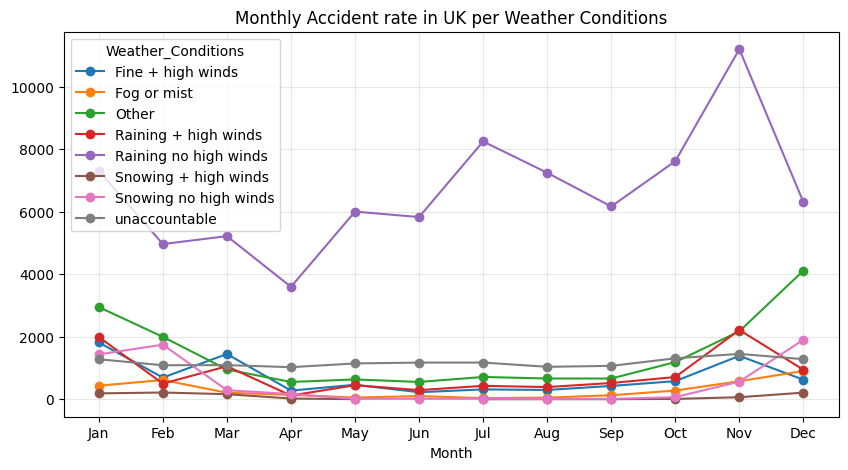

In [42]:
weather_exclustion = uk[uk['Weather_Conditions'] != 'Fine no high winds']
Weather_df = weather_exclustion.groupby(['Weather_Conditions','Month'])['Index'].count()
Weather_df = Weather_df.unstack(level=0)

Weather_df.plot(marker='o',
                figsize=(10,5),
                title = 'Monthly Accident rate in UK per Weather Conditions',

)
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

<h1>Insight #23:</h1>
<h5>Breakdown:</h5>
1. We can clearly see the hyphothesis made earlier
</br>
2. During the hot season 'June to August', snow and rain related conditions remain stable
</br>
3. The said weather spike again during 'October to January', which signals the transition from hot weather to cold weather

<h3>Frequency Distribution of the Light Conditions on Urban vs. Rural area</h3>

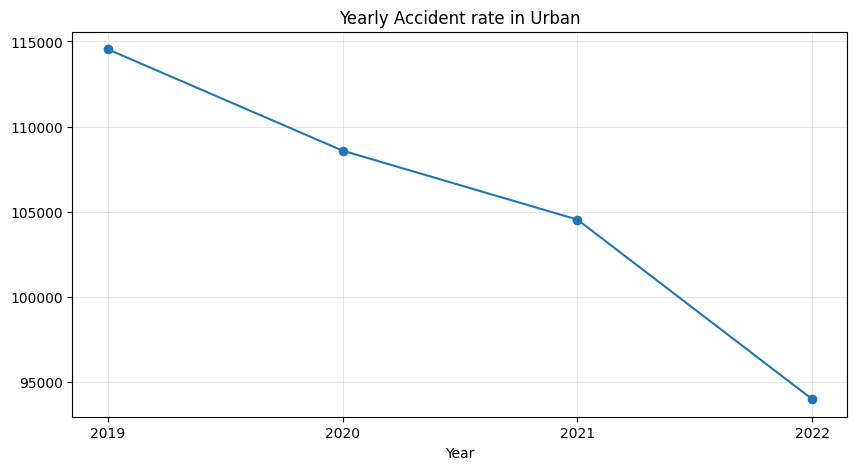

In [43]:
urban_df = uk[uk['Urban_or_Rural_Area']== 'Urban']
Light_Urban = urban_df.groupby('Year')['Index'].count()
# Light_Urban = Light_Urban.unstack(level=0)

Light_Urban.plot(
                marker='o',
                figsize=(10,5),
                title = 'Yearly Accident rate in Urban',

)
plt.xticks(range(2019,2023))
plt.grid(alpha=0.3)
plt.show()

<h1>Insight #24:</h1>
<h5>The yearly accident rate in Urban's negative decline is expected as we have seen the decline on the accident rate earlier.</h5>

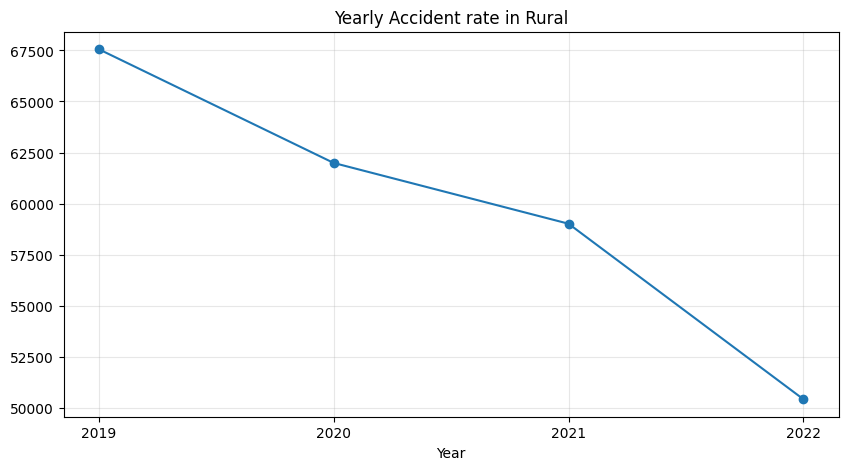

In [44]:
rural_df = uk[uk['Urban_or_Rural_Area']== 'Rural']
Light_Rural = rural_df.groupby('Year')['Index'].count()

Light_Rural.plot(
                marker='o',
                figsize=(10,5),
                title = 'Yearly Accident rate in Rural',

)
plt.xticks(range(2019,2023))
plt.grid(alpha=0.3)
plt.show()

<h1>Insight #25:</h1>
<h5>The chart may seem similar with Urban but we can see at the index at the left side the difference on the number. Similarly, the negative decline is inevitable as seen with the Yearly accident rate earlier</h5>

In [45]:
uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

<h1>A Data Analysis Journey: From National Trends to Local Insights</h1>

In [46]:
broxtowe_df = uk[uk['District Area'] == 'Broxtowe']
spelthorne_df = uk[uk['District Area'] == 'Spelthorne']
bolton_df = uk[uk['District Area'] == 'Bolton']
daventry_df = uk[uk['District Area'] == 'Daventry']
rotherham_df = uk[uk['District Area'] == 'Rotherham']
scarborough_df = uk[uk['District Area'] == 'Scarborough']

<h3>National Trend on Monthly road accidents</h3>

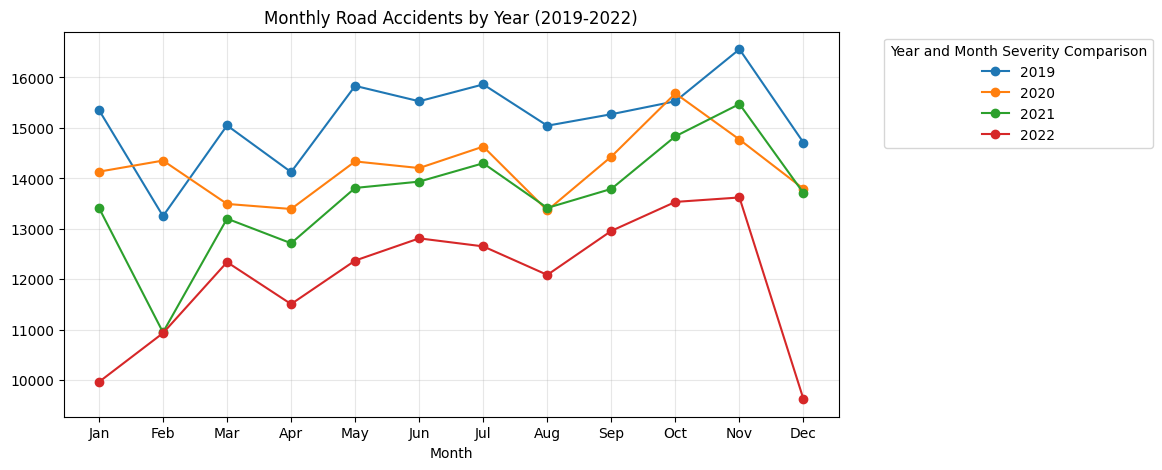

In [47]:
monthly_data = uk.groupby(['Year', 'Month']).size()
monthly_data = monthly_data.unstack(level=0)

monthly_data.plot(
    marker='o',
    figsize=(10, 5),
    title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h3>Broxtowe District</h3>

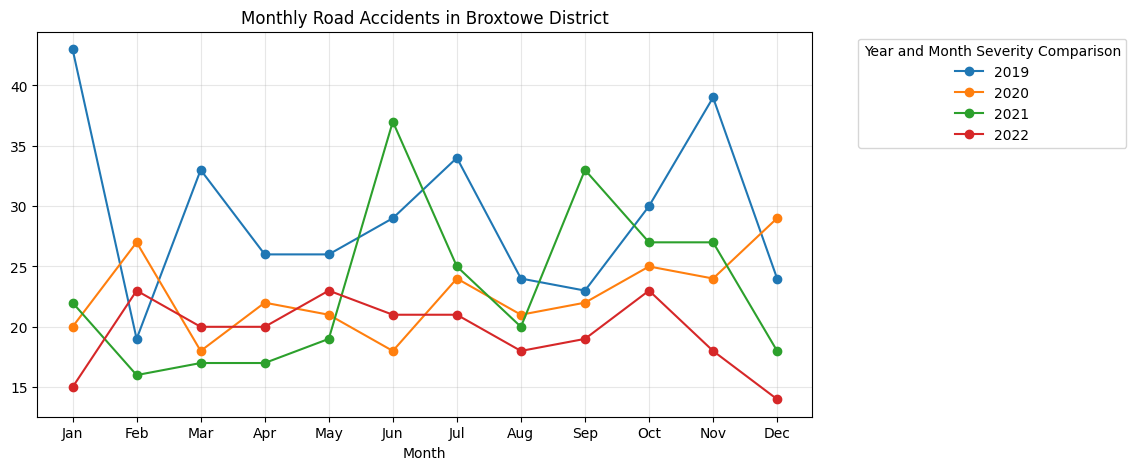

In [48]:
broxtowe_monthly_data = broxtowe_df.groupby(['Year', 'Month']).size()
broxtowe_monthly_data = broxtowe_monthly_data.unstack(level=0)

broxtowe_monthly_data.plot(
    marker='o',
    figsize=(10, 5),
    title='Monthly Road Accidents in Broxtowe District'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [49]:
broxtowe_locations = list(zip(broxtowe_df['Latitude'], broxtowe_df['Longitude']))
broxtowe_map = folium.Map(location=[broxtowe_df['Latitude'].mean(),broxtowe_df['Longitude'].mean()], zoom_start = 10)
HeatMap(broxtowe_locations).add_to(broxtowe_map)
broxtowe_map.save('broxtowe_heatmap.html')
broxtowe_map

<h1>Insight #26:</h1>
<h5>1. On January 2019, both National and Broxtowe district reach a high number of accidents recorded</h5>
<h5>2. On February of each year, both graph shows a decrease</h5>
<h5>3. From April up to december, a stable growth can be seen on the national records, while Broxtowe district on contrast, experienced a spike for each quarter</h5>
<h5>4. On June 2021, a noticeable increase can be seen. It surpassed the number of accidents on the surrounding year and is higher than the year 2019, which is expected to have the highest number of accidents.<h5>
<h3>Upon searching the internet, there is no major news about the trend</h3>

<h3>Spelthorne District</h3>

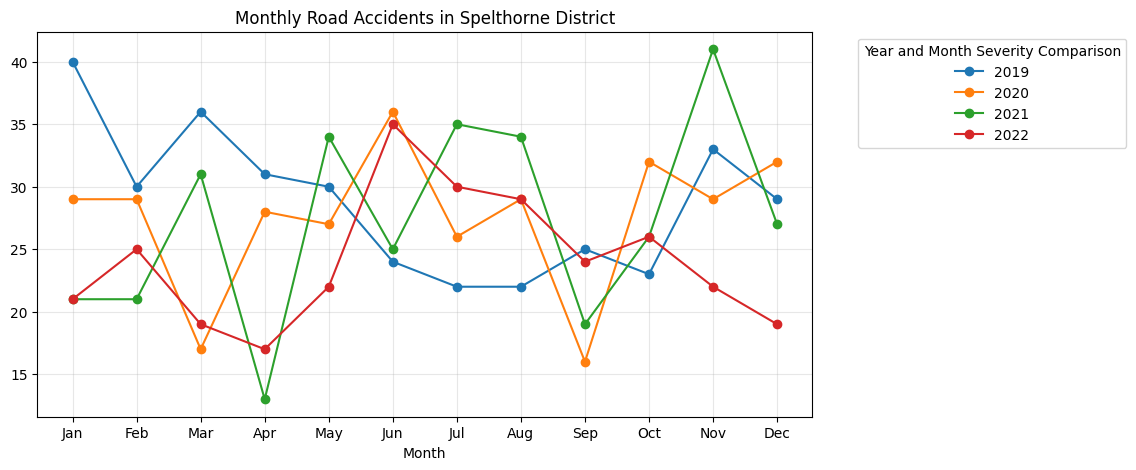

In [50]:
spelthorne_monthly_data = spelthorne_df.groupby(['Year', 'Month']).size()
spelthorne_monthly_data = spelthorne_monthly_data.unstack(level=0)

spelthorne_monthly_data.plot(
    marker='o',
    figsize=(10, 5),
    title='Monthly Road Accidents in Spelthorne District'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [51]:
spelthorne_locations = list(zip(spelthorne_df['Latitude'], spelthorne_df['Longitude']))
spelthorne_map = folium.Map(location=[spelthorne_df['Latitude'].mean(),spelthorne_df['Longitude'].mean()], zoom_start = 10)
HeatMap(spelthorne_locations).add_to(spelthorne_map)
spelthorne_map.save('spelthorne_heatmap.html')
spelthorne_map

<h1>Insight #27:</h1>
<h5>1. Unlike Broxtowe district, Spelthorne's chart is much complex</h5>
<h5>2. From March to October 2019, a major decline on the reports can be seen</h5>
<h5>3. But then, the succeding year during this period surpassed this record</h5>
<h5>4. A noticeable outlier on this chart is November 2021; thus the Spelthorne government conducted an <a href="https://www.w3schools.com/">emergency plan</a>
<h5>5. The result can be seen on the decrease of road accidents on the first quarter of year 2022</h5>



<h3>Bolton District</h3>

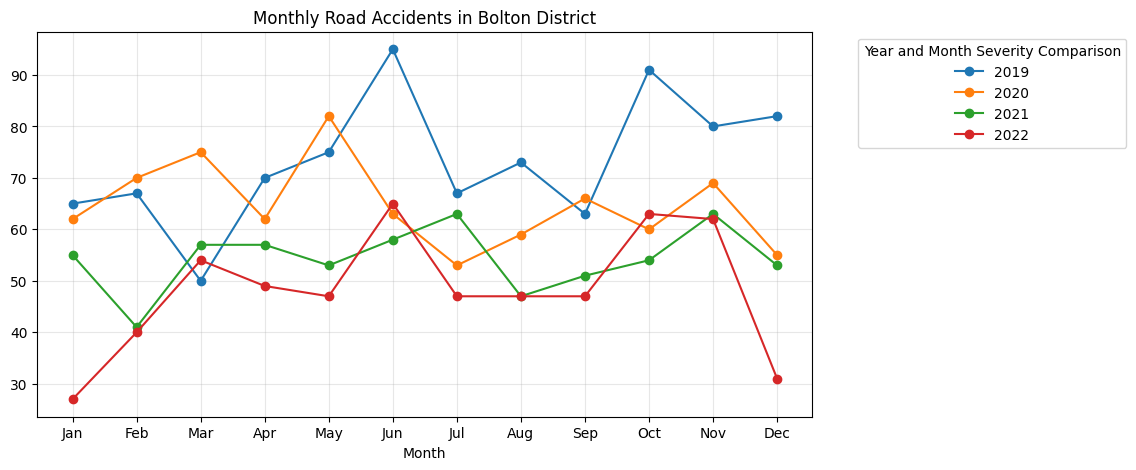

In [52]:
bolton_monthly_data = bolton_df.groupby(['Year', 'Month']).size()
bolton_monthly_data = bolton_monthly_data.unstack(level=0)

bolton_monthly_data.plot(
    marker='o',
    figsize=(10, 5),
    title='Monthly Road Accidents in Bolton District'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [53]:
bolton_locations = list(zip(bolton_df['Latitude'], bolton_df['Longitude']))
bolton_map = folium.Map(location=[bolton_df['Latitude'].mean(),bolton_df['Longitude'].mean()], zoom_start = 10)
HeatMap(bolton_locations).add_to(bolton_map)
bolton_map.save('bolton_heatmap.html')
bolton_map

<h1>Insight #28</h1>
<h5>1.Similar to other selected district, Bolton experiences a surge on the number of reports on June of 2019.</br>
2. The growth on Year 2019 were much more complex compared to a stable national trend.</br>
3. On May 2020, Bolton districted recorded 80 accidents; it's highest on the said year given that this is the time of pandemic.</br>
4. The district seems to recover as the number of accidents 2021 didn't surpassed the following year.</br>
5. The district reached it's lowest number of accident on January and December of 2022, similar on national trend</h5>


<h3>Daventry District</h3>

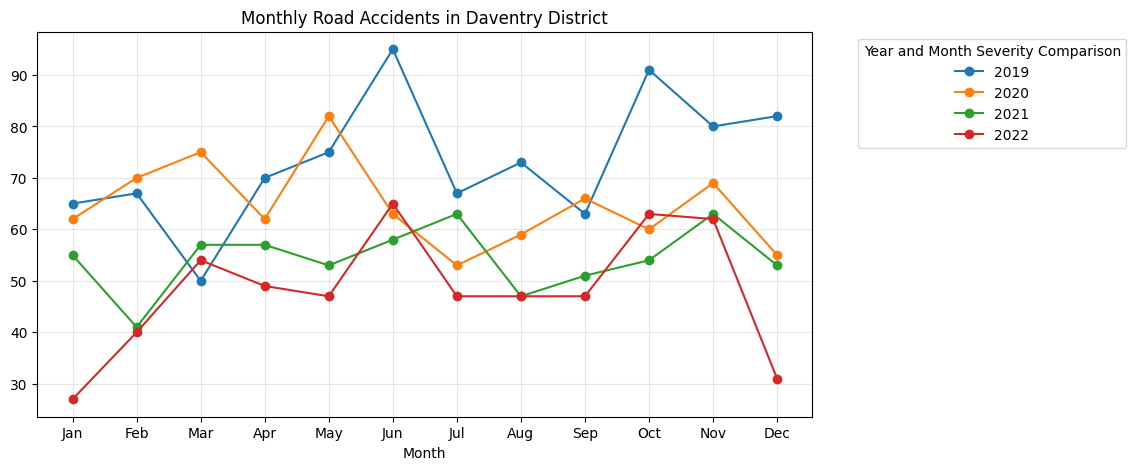

In [54]:
daventry_monthly_data = daventry_df.groupby(['Year', 'Month']).size()
daventry_monthly_data = daventry_monthly_data.unstack(level=0)

bolton_monthly_data.plot(
    marker='o',
    figsize=(10, 5),
    title='Monthly Road Accidents in Daventry District'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [55]:
daventry_locations = list(zip(daventry_df['Latitude'], daventry_df['Longitude']))
daventry_map = folium.Map(location=[daventry_df['Latitude'].mean(),daventry_df['Longitude'].mean()], zoom_start = 10)
HeatMap(daventry_locations).add_to(daventry_map)
daventry_map.save('daventry_heatmap.html')
daventry_map

<h1>Insight #29:</h1>
<h5>1. Similar trend on June 2019 occured on this district. </br>2.Comparison of the year 2019: the trend on 2019 on Daventry district are unstable compared to the national trend, with March, June, and October being the outliers.</br>3. Comparison of the year 2020: No major difference can be seen except that an increased trend occured on May 2019 but then decreased on the succeeding month.</br>4. Comparison of the year 2021: A stable minimal increasing trend can be seen on the selected district</br>5. Comparison of the year 2022: a spike occured on June 2019 but except for that; nothing major happened.

<h3>Rotherham District</h3>

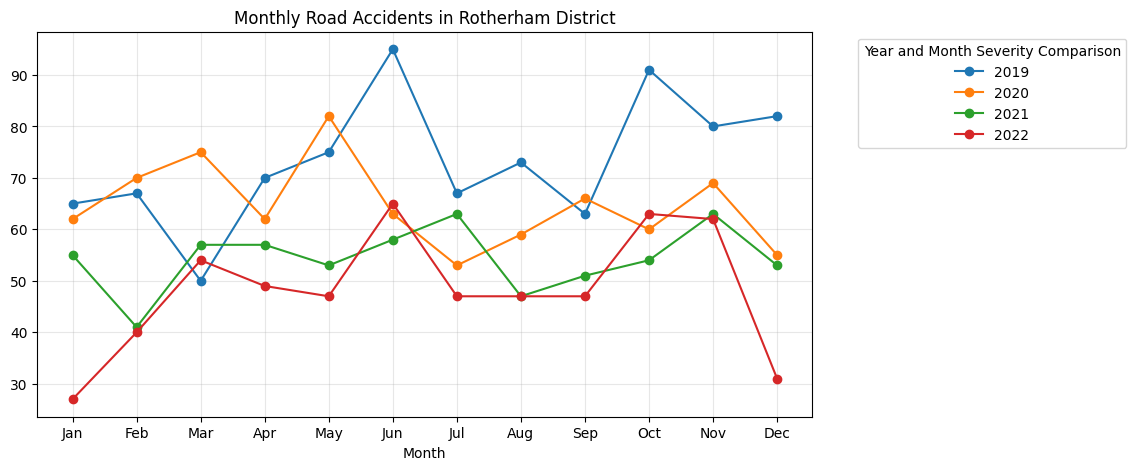

In [56]:
rotherham_monthly_data = rotherham_df.groupby(['Year', 'Month']).size()
rotherham_monthly_data = rotherham_monthly_data.unstack(level=0)

bolton_monthly_data.plot(
    marker='o',
    figsize=(10, 5),
    title='Monthly Road Accidents in Rotherham District'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [57]:
rotherham_locations = list(zip(rotherham_df['Latitude'], rotherham_df['Longitude']))
rotherham_map = folium.Map(location=[rotherham_df['Latitude'].mean(),rotherham_df['Longitude'].mean()], zoom_start = 10)
HeatMap(rotherham_locations).add_to(rotherham_map)
rotherham_map.save('rotherham_heatmap.html')
rotherham_map

<h1>Insight #30:<h1>
<h5>1. Outliers: June 2019, similar to other district</br>2. Comparison of the year 2019: Rotherham district's growth are unstable and have a pattern of increase - decrease - increase and so on.</br>3. Comparison of the year 2020: Same situation with year 2019.</br>4. Comparison of the year 2021: Both chart have a distinguisable pattern.</br>5. Comparison of the year 2022: A spike on the number of accidents can be seen on June, with the similar event occured on June of year 2019

<h3>Scarborough District</h3>

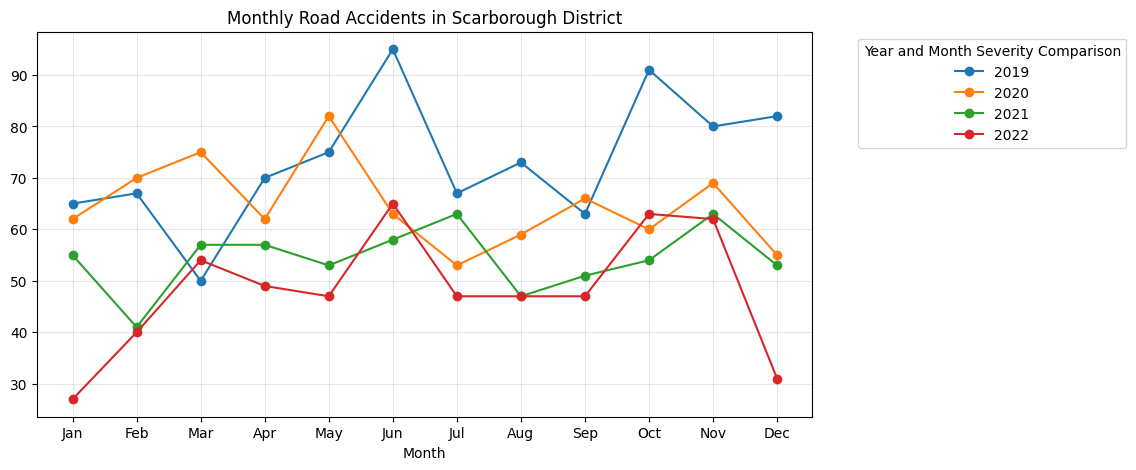

In [58]:
scarborough_monthly_data = scarborough_df.groupby(['Year', 'Month']).size()
scarborough_monthly_data = scarborough_monthly_data.unstack(level=0)

bolton_monthly_data.plot(
    marker='o',
    figsize=(10, 5),
    title='Monthly Road Accidents in Scarborough District'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [59]:
scarborough_locations = list(zip(scarborough_df['Latitude'], scarborough_df['Longitude']))
scarborough_map = folium.Map(location=[scarborough_df['Latitude'].mean(),scarborough_df['Longitude'].mean()], zoom_start = 10)
HeatMap(scarborough_locations).add_to(scarborough_map)
scarborough_map.save('scarborough_heatmap.html')
scarborough_map

<h1>Insight #31:</h1>
<h5>1. Outlier: June 2019, similar to other districts. </br>2. Comparison of the year 2019: Scarborough district's chart are unstable compared to the national</br>3. Comparison of the year 2020: scarborough district starts the year with a high number of accidents then declined at the remaining months.</br>4. Comparison of the year 2022: with the same pattern as national, both january and december reached an all-time low record.